For a fixed value of the energy $\epsilon_n = 1, \; \gamma = 0$, and initial launch conditions $\phi = 1, \; \phi_x = \sqrt{KL^2 - 1}$, we will conduct a convergence study.

In [1]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Parameters
L = 2				# Boundary values
K = 1				# Force constant
eps = 1				# Eigenvalue
x_span = [-L, L]	# x system

# Initial condition
y0 = [1, np.sqrt(K * L**2 - eps)]

# Tolerance values for convergance study
TOL_values = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

In [3]:
average_step_sizes = {
    'RK45': [],
    'RK23': [],
    'Radau': [],
    'BDF': []
}

# RHS function for the differential equation
def rhs_a(x, y, K, epsilon):
	return [y[1], (K * x**2 - epsilon) * y[0]]

In [5]:
# Convergence study

# Solving for different methods and storing average step sizes
for tol in TOL_values:
	options = { 'args': (K, eps), 'rtol': tol, 'atol': tol }
	for scheme in average_step_sizes.keys():
		sol = solve_ivp(rhs_a, x_span, y0, method=scheme, **options)
		avg_step_size = np.mean(np.diff(sol.t))
		average_step_sizes[scheme].append(avg_step_size)

In [9]:
display(average_step_sizes)
display(sol)
display(np.mean(np.diff(sol.t)))

{'RK45': [0.4444444444444444,
  0.2857142857142857,
  0.19047619047619044,
  0.12121212121212122,
  0.0784313725490196,
  0.05,
  0.03174603174603174],
 'RK23': [0.1111111111111111,
  0.05333333333333334,
  0.024844720496894408,
  0.011560693641618497,
  0.005361930294906166,
  0.0024922118380062306,
  0.0011570726063060456],
 'Radau': [0.21052631578947367,
  0.1176470588235294,
  0.06557377049180327,
  0.03773584905660377,
  0.021505376344086023,
  0.011834319526627219,
  0.006896551724137931],
 'BDF': [0.10526315789473684,
  0.07017543859649122,
  0.050632911392405076,
  0.03508771929824561,
  0.024539877300613498,
  0.01731601731601732,
  0.012232415902140673]}

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [-2.000e+00 -2.000e+00 ...  1.990e+00  2.000e+00]
        y: [[ 1.000e+00  1.000e+00 ...  8.584e-01  8.385e-01]
            [ 1.732e+00  1.732e+00 ... -1.971e+00 -1.945e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 780
     njev: 2
      nlu: 61

0.012232415902140673

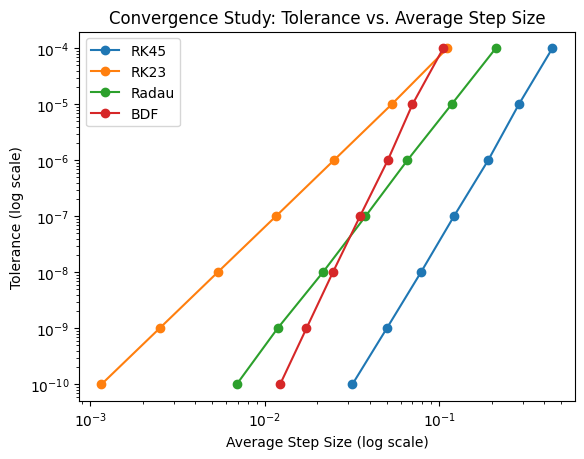

In [10]:
# Plotting 

# Plotting with timestep on x-axis and tolerance on y-axis

plt.figure()

for scheme, step_size in average_step_sizes.items():
	plt.loglog(step_size, TOL_values, 'o-', label=f"{scheme}")

plt.ylabel("Tolerance (log scale)")
plt.xlabel("Average Step Size (log scale)")
plt.title("Convergence Study: Tolerance vs. Average Step Size")

# plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [11]:
# Computing and outputting slopes for the log-log plot
slopes = {}
for method, steps in average_step_sizes.items():
	slope = np.polyfit(np.log(steps), np.log(TOL_values), 1)[0]
	slopes[method] = slope
	print(f"Slope for {method}: {slope}")

Slope for RK45: 5.244667561772172
Slope for RK23: 3.0190995295045027
Slope for Radau: 4.038199269261616
Slope for BDF: 6.457512609631294


Thus, we find empirical evidence that 

| Scheme | Order  |
| ------ | ------ |
| RK23   | Second |
| Radau  | Third  |
| RK45   | Fourth |
| BDF    | Fifth  |

